In [4]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scrapping the data
---

In [11]:
req = Request(
        url='https://www.scrapethissite.com/pages/simple/',
        headers={'User-Agent': 'Mozilla/5.0'}
        )
html = urlopen(req).read()
page = BeautifulSoup(html,'html.parser')

# Getting all the country divs in the site 
divs = page.find_all('div',{'class':'col-md-4 country'})
headers = ['country','capital','population','area_km²']
rows =[]
for i, row in enumerate(divs):
    div_text = row.get_text().strip().replace('  ','').split('\n')
    entry = []
    for x in div_text:
        if len(x) > 0:
            if ':' in x:
                entry.append(x.split(':')[1])
            else:
                entry.append(x)
    rows.append(entry)

data = pd.DataFrame(rows,columns=headers)

# Simple EDA
---

In [12]:
data

,country,capital,population,area_km²
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     250 non-null    object
 1   capital     250 non-null    object
 2   population  250 non-null    object
 3   area_km²    250 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


In [27]:
# Convert columns to numeric
data['population'] = pd.to_numeric(data['population'], errors='coerce')
data['area_km²'] = pd.to_numeric(data['area_km²'], errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     250 non-null    object 
 1   capital     250 non-null    object 
 2   population  250 non-null    int64  
 3   area_km²    250 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


# Population vs Area
***

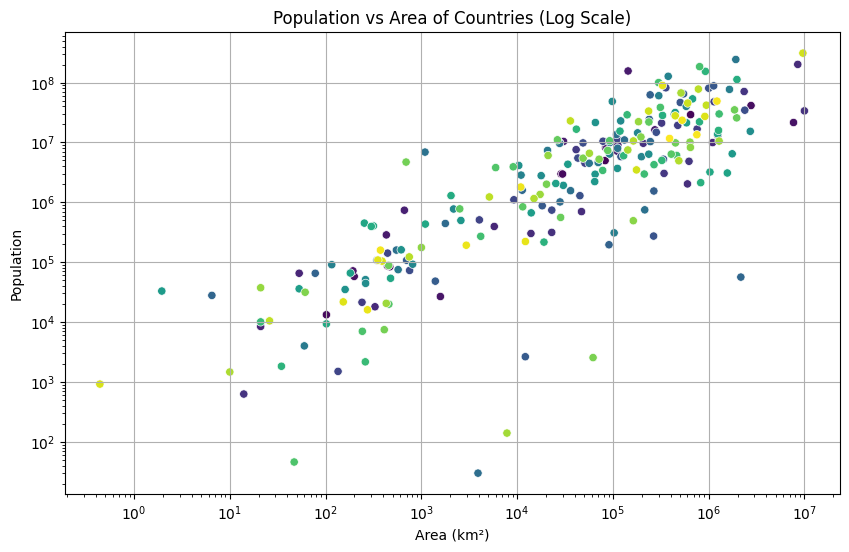

In [17]:
# Filter out outliers 
filtered_data = data[(data['population'] > 0) & (data['population'] < 1e9) & 
                     (data['area_km²'] > 0) & (data['area_km²'] < 1e7)]

# Create the scatter plot with logarithmic scales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['area_km²'], y=filtered_data['population'], hue=filtered_data['country'], palette="viridis", legend=False)
plt.xscale('log')  # Apply logarithmic scale to the x-axis
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Population vs Area of Countries (Log Scale)')
plt.xlabel('Area (km²)')
plt.ylabel('Population')
plt.grid(True)
plt.show()

### 1. Relationship Between Population and Area

**General Trend**: Countries with larger areas don't necessarily have larger populations. The data points are scattered, showing no clear linear relationship.

**Densely Populated Small Countries**: Some small countries might have relatively high populations (e.g., city-states like Singapore or countries like Bangladesh). These would appear in the lower-right region of the plot.

**Large But Sparsely Populated Countries**: Conversely, countries with large areas but smaller populations (like Mongolia or Canada) will appear in the upper-left part of the plot.

### 2. Use of Logarithmic Scale

**Better Spread of Data**: By applying a logarithmic scale, managed to spread out the data points more evenly across the plot. This is especially helpful when dealing with wide-ranging values.

**Clusters**: You may observe clusters of countries, particularly around certain population sizes (e.g., many countries with populations in the millions but areas under 1 million km²).

### 3. Identifying Outliers

**Top Right (Large Population & Area)**: Countries like China and India (large population and significant area) will likely be towards the top right.

**Bottom Left (Small Population & Area)**: Tiny island nations or microstates might appear towards the bottom left.

### 4. Density and Sparsity
The plot reveal how densely populated or sparsely populated certain countries are by comparing their position relative to the general trend. Countries far above or below the central mass of points might be of particular interest.

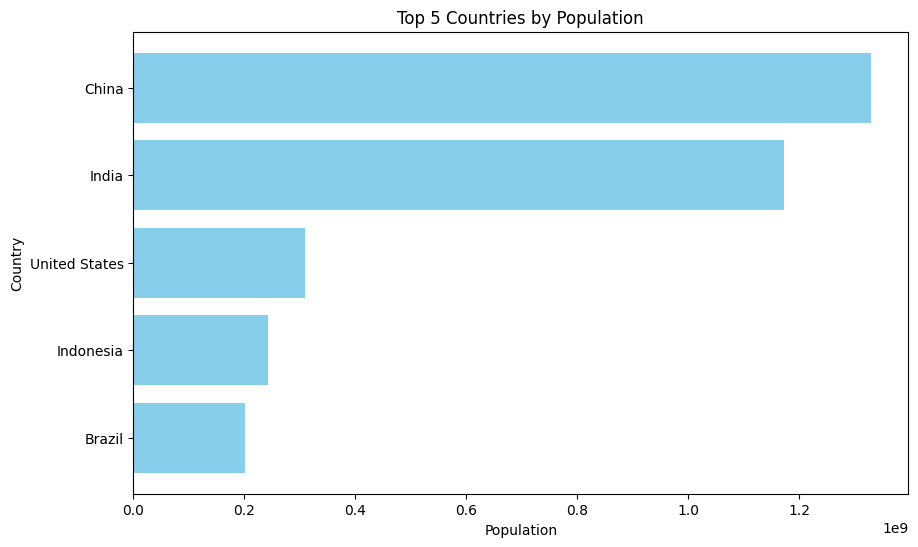

In [23]:
# Top 5 countries by population
top_5_population = data.nlargest(5, 'population')[['country', 'population']]

# Plotting the top 5 countries by population
plt.figure(figsize=(10, 6))
plt.barh(top_5_population['country'], top_5_population['population'], color='skyblue')
plt.title('Top 5 Countries by Population')
plt.xlabel('Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


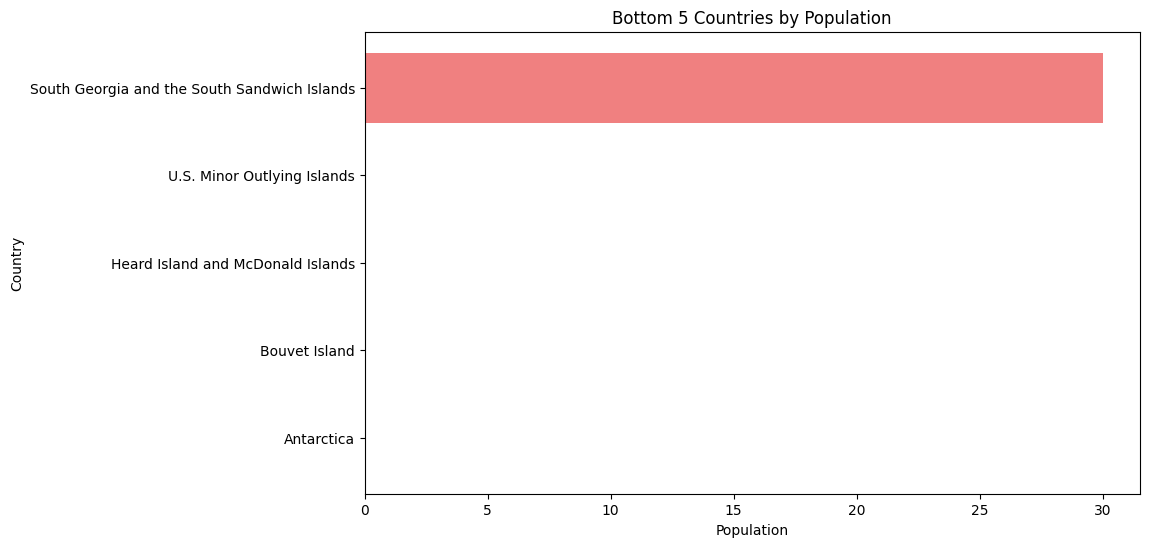

In [24]:
# Bottom 5 countries by population
bottom_5_population = data.nsmallest(5, 'population')[['country', 'population']]

# Plotting the bottom 5 countries by population
plt.figure(figsize=(10, 6))
plt.barh(bottom_5_population['country'], bottom_5_population['population'], color='lightcoral')
plt.title('Bottom 5 Countries by Population')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

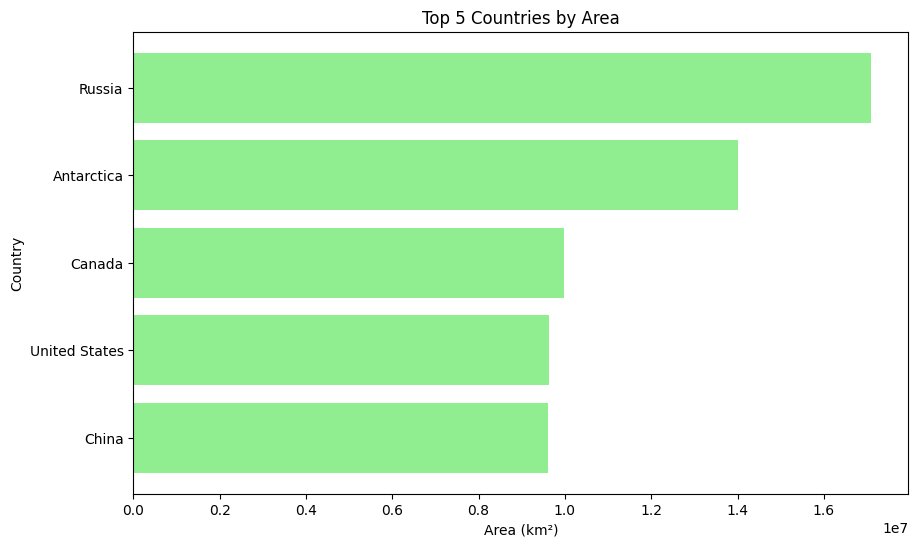

In [25]:
# Top 5 countries by area
top_5_area = data.nlargest(5, 'area_km²')[['country', 'area_km²']]

# Plotting the top 5 countries by area
plt.figure(figsize=(10, 6))
plt.barh(top_5_area['country'], top_5_area['area_km²'], color='lightgreen')
plt.title('Top 5 Countries by Area')
plt.xlabel('Area (km²)')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

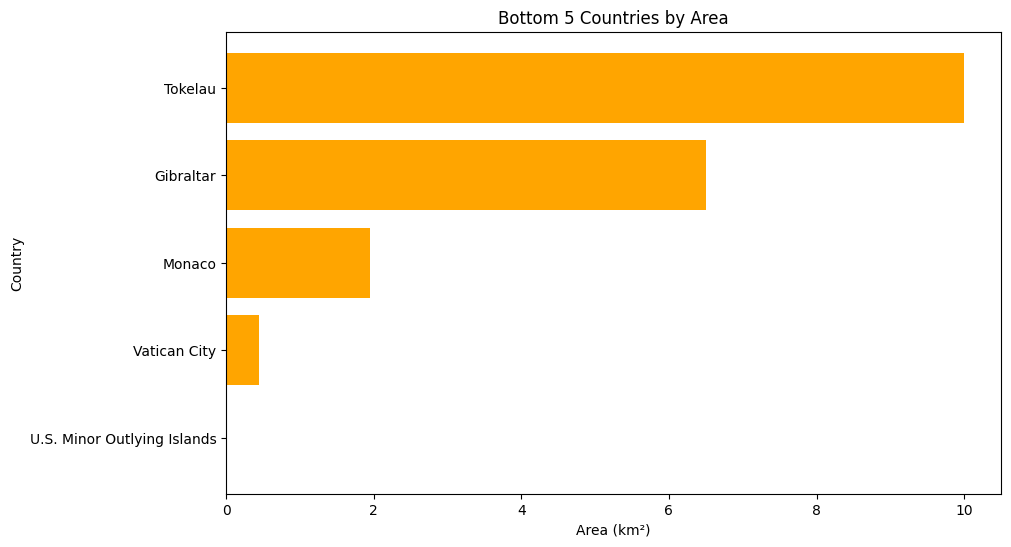

In [26]:
# Bottom 5 countries by area
bottom_5_area = data.nsmallest(5, 'area_km²')[['country', 'area_km²']]

# Plotting the bottom 5 countries by area
plt.figure(figsize=(10, 6))
plt.barh(bottom_5_area['country'], bottom_5_area['area_km²'], color='orange')
plt.title('Bottom 5 Countries by Area')
plt.xlabel('Area (km²)')
plt.ylabel('Country')
plt.show()